In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 # OpenCV
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Original image, which is the background
background = cv2.imread('/content/drive/MyDrive/sketch.jpg')
background = cv2.cvtColor(background, cv2.COLOR_BGR2RGB)

# Image of the object
img = cv2.imread('/content/drive/MyDrive/hat.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Image the object's mask
mask = cv2.imread('/content/drive/MyDrive/hat_mask.jpeg')
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

print("Background shape:", background.shape)
print("Image shape:", img.shape)
print("Mask shape:", mask.shape)

Background shape: (1280, 1075, 3)
Image shape: (944, 1280, 3)
Mask shape: (944, 1280, 3)


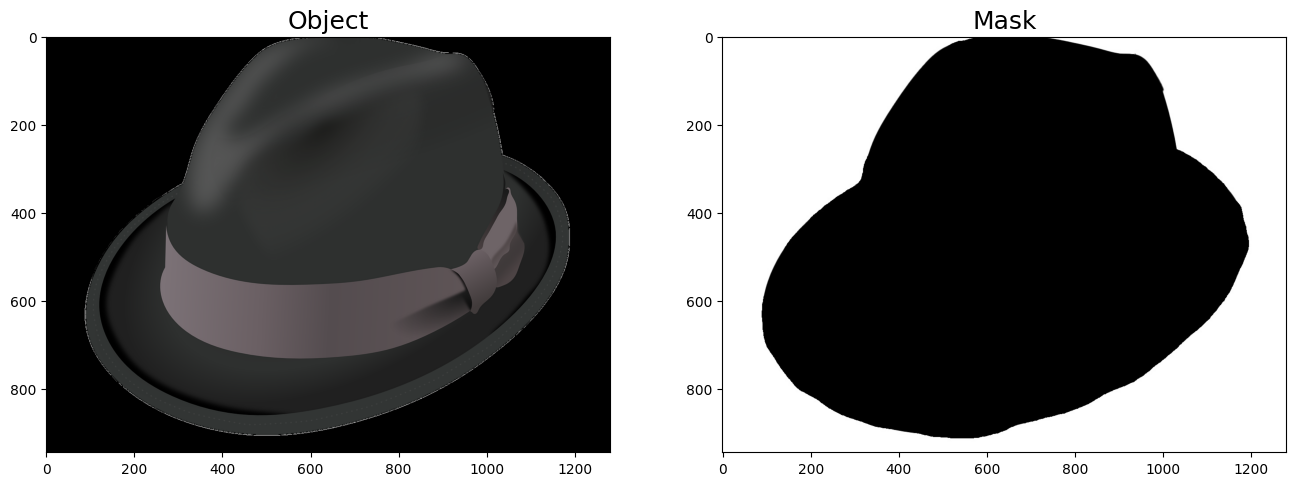

In [ ]:
plt.figure(figsize=(16,16))
plt.title("Background", fontsize=18)
plt.imshow(background);

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img)
ax[0].set_title('Object', fontsize=18)
ax[1].imshow(mask)
ax[1].set_title('Mask', fontsize=18);

Shape of the image of the object: (944, 1280, 3)
Shape of the boolean mask: (944, 1280)




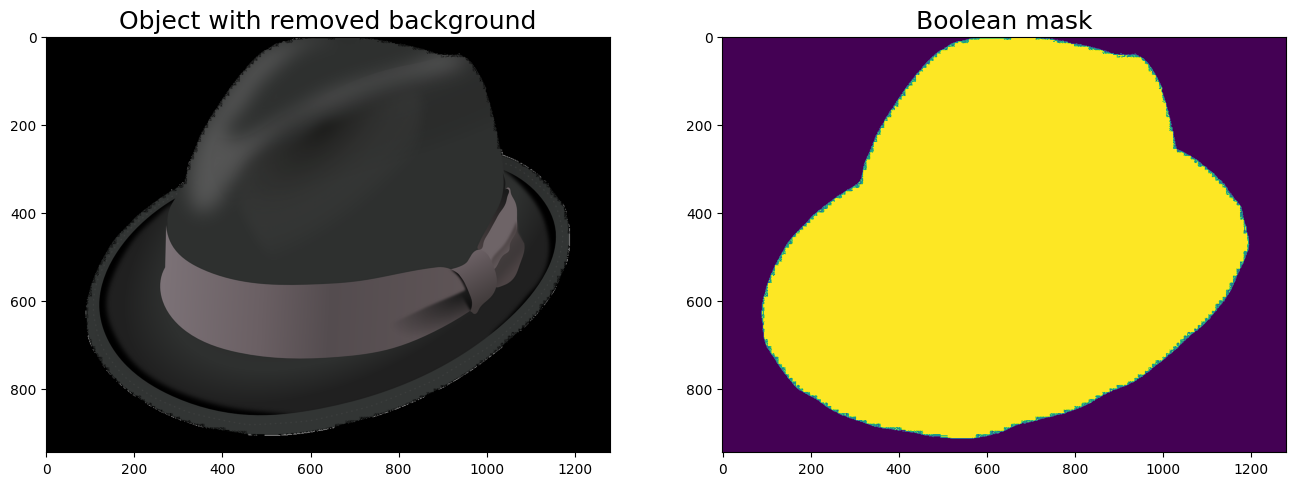

In [ ]:
def remove_obj_background(img_path, mask_path):
    '''
    Function returns:
    - image of the object with removed background in CV2 RGB format (numpy array with dimensions (width, height, 3))
    - boolean mask of the object (numpy array with dimensions (width, height))
    '''
    img = cv2.imread('/content/drive/MyDrive/hat.png')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = cv2.imread('/content/drive/MyDrive/hat_mask.jpeg')
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

    h, w = mask.shape[0], mask.shape[1]

    # Boolean mask is a numpy array with two dimensions: width and height.
    # On the original mask, object area is filled with black color, background area is filled with white color.
    # On the boolean mask, object area is filled with True, background area is filled with False.
    mask_boolean = mask[:,:,0] == 0
    img_with_removed_background = img * np.stack([mask_boolean, mask_boolean, mask_boolean], axis=2)

    return img_with_removed_background, mask_boolean

img_with_removed_background, mask_boolean = remove_obj_background('cup.png', 'cup_mask.png')
print("Shape of the image of the object:", img_with_removed_background.shape)
print("Shape of the boolean mask:", mask_boolean.shape)
print("\n")

fig, ax = plt.subplots(1, 2, figsize=(16, 7))
ax[0].imshow(img_with_removed_background)
ax[0].set_title('Object with removed background', fontsize=18)
ax[1].imshow(mask_boolean)
ax[1].set_title('Boolean mask', fontsize=18);

In [ ]:
def add_obj(background, img, mask, x, y):
    '''
    Arguments:
    background - background image in CV2 RGB format
    img - image of object in CV2 RGB format
    mask - mask of object in CV2 RGB format
    x, y - coordinates of the center of the object image
    0 < x < width of background
    0 < y < height of background

    Function returns background with added object in CV2 RGB format

    CV2 RGB format is a numpy array with dimensions width x height x 3
    '''

    bg = background.copy()

    h_bg, w_bg = bg.shape[0], bg.shape[1]

    h, w = img.shape[0], img.shape[1]

    # Calculating coordinates of the top left corner of the object image
    x = x - int(w/2)
    y = y - int(h/2)

    mask_boolean = mask[:,:,0] == 0
    mask_rgb_boolean = np.stack([mask_boolean, mask_boolean, mask_boolean], axis=2)

    if x >= 0 and y >= 0:

        h_part = h - max(0, y+h-h_bg) # h_part - part of the image which overlaps background along y-axis
        w_part = w - max(0, x+w-w_bg) # w_part - part of the image which overlaps background along x-axis

        bg[y:y+h_part, x:x+w_part, :] = bg[y:y+h_part, x:x+w_part, :] * ~mask_rgb_boolean[0:h_part, 0:w_part, :] + (img * mask_rgb_boolean)[0:h_part, 0:w_part, :]

    elif x < 0 and y < 0:

        h_part = h + y
        w_part = w + x

        bg[0:0+h_part, 0:0+w_part, :] = bg[0:0+h_part, 0:0+w_part, :] * ~mask_rgb_boolean[h-h_part:h, w-w_part:w, :] + (img * mask_rgb_boolean)[h-h_part:h, w-w_part:w, :]

    elif x < 0 and y >= 0:

        h_part = h - max(0, y+h-h_bg)
        w_part = w + x

        bg[y:y+h_part, 0:0+w_part, :] = bg[y:y+h_part, 0:0+w_part, :] * ~mask_rgb_boolean[0:h_part, w-w_part:w, :] + (img * mask_rgb_boolean)[0:h_part, w-w_part:w, :]

    elif x >= 0 and y < 0:

        h_part = h + y
        w_part = w - max(0, x+w-w_bg)

        bg[0:0+h_part, x:x+w_part, :] = bg[0:0+h_part, x:x+w_part, :] * ~mask_rgb_boolean[h-h_part:h, 0:w_part, :] + (img * mask_rgb_boolean)[h-h_part:h, 0:w_part, :]

    return bg

In [ ]:
composition_1 = add_obj(background, img, mask, 200, 200)
plt.figure(figsize=(15,15))
plt.imshow(composition_1);

In [ ]:
composition_2 = add_obj(composition_1, img, mask, 200, 1100)
plt.figure(figsize=(15,15))
plt.imshow(composition_2);